In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
data = np.genfromtxt("Energy.dat")

In [3]:
totalEnergy = data[:,1]
totalEnergyDropLast = totalEnergy[:-1]
totalEnergyDropFirst = totalEnergy[1:]
totalEnergyDiff = np.abs(totalEnergyDropLast - totalEnergyDropFirst)
totalEnergyDiffFrac = totalEnergyDiff / totalEnergyDropLast

coatEnergy = data[:,3]
coatEnergyDropLast = coatEnergy[:-1]
coatEnergyDropFirst = coatEnergy[1:]
coatEnergyDiff = np.abs(coatEnergyDropLast - coatEnergyDropFirst)
coatEnergyDiffFrac = coatEnergyDiff / coatEnergyDropLast

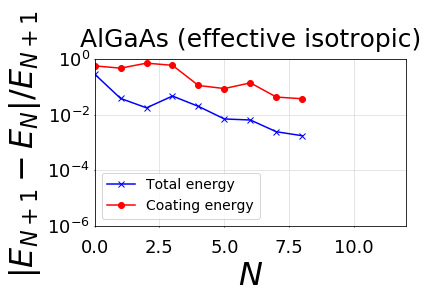

In [5]:
fig = plt.gcf()
ax = plt.gca()

gridwidth=0.5
gridcolor=(0.8,0.8,0.8)

myAxisLabelSize=32
myTickLabelSize=18
myLegendLabelSize=14
myTitleSize=25

ax.plot(data[:,0][:-1], totalEnergyDiffFrac, marker='x', label='Total energy', color='b')
ax.plot(data[:,0][:-1], coatEnergyDiffFrac, marker='o', label='Coating energy', color='r')

ax.set_xlim([0,12])
ax.set_ylim([1e-6,1e0])

ax.set_yscale('log')

ax.set_xlabel('$N$', fontsize=myAxisLabelSize)
ax.set_ylabel('$|E_{N+1} - E_{N}|/ E_{N+1}$ ', fontsize=myAxisLabelSize)

ax.tick_params(axis='x', labelsize=myTickLabelSize, pad=12, length=1)
ax.tick_params(which='minor', length=1)
ax.tick_params(axis='y', labelsize=myTickLabelSize, length=1)
ax.grid(b=True, which='major', color=gridcolor, linestyle='solid', linewidth=gridwidth)

ax.set_title('AlGaAs (effective isotropic)', fontsize=myTitleSize, color='k', y=1.04)
ax.legend(loc='lower left', fontsize=myLegendLabelSize)

fig.tight_layout()
pdf = PdfPages('EnergyConvergence.pdf')
pdf.savefig()
pdf.close()